# Sprint 1 - Lab Exercise - 20210114

**Team Pat Members:** Hurly | Joseph | Mikee | Phoemela

-------------------

### Instructions

**Setup**
- Download the files from the compressed folder: [education_analytics.zip](https://courses.eskwelabs.com/courses/18/files/3662/download?wrap=1)
- You will be doing the rest of the exercise from scratch. 

**Performing EDA**
- Read and check all csv, is it possible to merge all csv into one?
- Combine all mergeable csv into one dataframe.
- Study the consolidated dataframe. What are you most interested in finding out?
- Discuss among your group what are the conceptualization questions you want to answer.
- Identify if this can be operationalized using the data provided.
- Provide at least 3 questions for your group to answer.
- Use what you've learned in the previous days to answer your questions. 

**Presenting Results**
- Prepare one powerpoint or google slides presentation for your group
- The presentation must contain:
    (a) Background / Context: What problem or questions are you trying to solve?
    (b) Data Information: What is your source of data? Which information from the data did you use? How reliable is the data?
    (c) Methodology: What are the tools you used? What is your process flow to arrive at the solution?
    (d) Results: What did you find out?
    (e) Conclusion and Recommendations: Based on what you discovered, what can be done?
- You will be given only 5 minutes to present your powerpoint. Ensure that your presentation is concise but informative.


---------------

### Tasks

**7:35 to 8:00 PM** - All will check the different datasets provided and merge it into one usable dataframe that everyone in the team can use for the EDA. Remember to check shape, columns, and other info provided for each dataset. Also check for missing and duplicate values. 

**8:00 to 8:10 PM** - After knowing available information, what do you want to know from the data? Think of 4 questions to answer (1 question per fellow). 

**8:10 to 8:30 PM** - Each fellow will wrangle final dataframe to answer their own question and come up with a graph visualizing the result. Choose a visual that best represents your result.

**8:30 PM to 8:55 PM** - Create presentation slides. Each fellow will work on at least 2 slides. One for the result of their EDA + another part of presentation (background, data information, methodology, conclusion & recommendations)

----------------------

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

----------------------


## Data Preparation

In [2]:
# Code for data checks + merging

import glob

masterlist = pd.read_csv('Masterlist of Schools.csv')
print(masterlist.shape)
print(masterlist.columns)

df_all = masterlist.copy()

files = glob.glob('*.csv')

for file in files:
    if 'Masterlist' not in file:
        try:
            file_df = pd.read_csv(file, encoding = 'utf-8')
        except:
            file_df = pd.read_csv(file, encoding = 'latin-1')
        print(file)
        print(file_df.shape)
        print(file_df.columns)
        if 'School ID' in file_df.columns:
            file_df = file_df.rename(columns = {'School ID':'school.id'})
        df_all = df_all.merge(file_df, on = 'school.id', how = 'left')
        
print(df_all.shape)
print(df_all.columns)
print(df_all.info())

(46603, 23)
Index(['school.id', 'school.name', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban'],
      dtype='object')
Enrollment Master Data_2015_E.csv
(38649, 17)
Index(['School ID', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Female', 'SPED NG Male',
       'SPED NG Female'],
      dtype='object')
Enrollment Master Data_2015_S.csv
(7977, 15)
Index(['School ID', '

In [3]:
df_all = df_all.drop(columns=['school.name_y','School Name', 'Region', 'Province',
       'Municipality', 'Division', 'District', 'Offering'])

df_all = pd.melt(df_all, id_vars = ['school.id', 'school.name_x', 'school.region', 'school.region.name',
       'school.province', 'school.cityhall', 'school.division',
       'school.citymuni', 'school.district', 'school.legdistrict',
       'school.type', 'school.abbrev', 'school.previousname',
       'school.mother.id', 'school.address', 'school.established',
       'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'school.enrollment',
       'school.offering', ' school.mooe ', 'rooms.standard.academic',
       'rooms.standard.unused', 'rooms.nonstandard.academic',
       'rooms.nonstandard.unused', 'Name of Principal',
       'Enrolment', 'Latitude', 'Longitude', 'teachers.instructor',
       'teachers.mobile', 'teachers.regular', 'teachers.sped'])


df_all['gender'] = ['Male' if 'Male|Male_x|Male_y' in x else 'Female' for x in df_all['variable']]
df_all['year_level'] = df_all['variable'].str.replace('Male|Male_x|Male_y|Female|Female_x|Female_y','').apply(lambda x: x.strip())
df_all = df_all.rename(columns = {'value': 'enroll_yr_gen'})

In [4]:
df_all['year_level'].unique()

array(['Kinder', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
       'Grade 6', 'SPED NG _x', 'Grade 7', 'Grade 8', 'Grade 9',
       'Grade 10', 'Grade 11', 'Grade 12', 'SPED NG _y'], dtype=object)

In [5]:
df_all.isna().sum()

school.id                           0
school.name_x                       0
school.region                       0
school.region.name                  0
school.province                     0
school.cityhall                    30
school.division                     0
school.citymuni                     0
school.district                     0
school.legdistrict                  0
school.type                         0
school.abbrev                  853080
school.previousname            131460
school.mother.id                  210
school.address                  59460
school.established                270
school.classification               0
school.classification2              0
school.curricularclass              0
school.organization                 0
school.cityincome               29280
school.cityclass              1151700
school.urban                       90
school.enrollment               77340
school.offering                 77340
 school.mooe                    77340
rooms.standa

In [6]:
df_all = df_all[~df_all['enroll_yr_gen'].isna()]

df_all.isna().sum()

school.id                          0
school.name_x                      0
school.region                      0
school.region.name                 0
school.province                    0
school.cityhall                   14
school.division                    0
school.citymuni                    0
school.district                    0
school.legdistrict                 0
school.type                        0
school.abbrev                 446392
school.previousname            67970
school.mother.id                 110
school.address                 31232
school.established               132
school.classification              0
school.classification2             0
school.curricularclass             0
school.organization                0
school.cityincome              15226
school.cityclass              601118
school.urban                      46
school.enrollment              39358
school.offering                39358
 school.mooe                   39358
rooms.standard.academic         3566
r

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728642 entries, 0 to 1398089
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   school.id                   728642 non-null  int64  
 1   school.name_x               728642 non-null  object 
 2   school.region               728642 non-null  object 
 3   school.region.name          728642 non-null  object 
 4   school.province             728642 non-null  object 
 5   school.cityhall             728628 non-null  object 
 6   school.division             728642 non-null  object 
 7   school.citymuni             728642 non-null  object 
 8   school.district             728642 non-null  object 
 9   school.legdistrict          728642 non-null  object 
 10  school.type                 728642 non-null  object 
 11  school.abbrev               282250 non-null  object 
 12  school.previousname         660672 non-null  object 
 13  school.mother

----------------------


## Exploratory Data Analysis

### Question 1

Difference between MOOE of primary and secondary education by province

In [8]:
# Codes for question 1

In [9]:
df_all2 = df_all[~df_all[" school.mooe "].isna()]
df_all2

,school.id,school.name_x,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,...,Latitude,Longitude,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,variable,enroll_yr_gen,gender,year_level
0,101746,"A. Diaz, Sr. ES",Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan II, Binalonan",BAUTISTA,Bautista,5th District,...,15.799122,120.498531,0.0,1.0,20.0,0.0,Kinder Male,57,Female,Kinder
1,102193,A. P. Santos ES (SPED Center),Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Laoag City,LAOAG CITY (Capital),Laoag City District II,1st District,...,18.196389,120.586667,0.0,2.0,12.0,4.0,Kinder Male,20,Female,Kinder
2,101283,A.P. Guevara IS,Region I,Ilocos Region,PANGASINAN,PANGASINAN,"Pangasinan I, Lingayen",BAYAMBANG,Bayambang II,3rd District,...,15.780155,120.460509,0.0,1.0,6.0,0.0,Kinder Male,16,Female,Kinder
3,100216,Ab-Abut ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,PIDDIG,Piddig,1st District,...,18.168875,120.695392,0.0,1.0,6.0,0.0,Kinder Male,10,Female,Kinder
4,100043,Abaca ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BANGUI,Bangui,1st District,...,18.531941,120.755890,0.0,1.0,8.0,0.0,Kinder Male,12,Female,Kinder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398085,305308,Valeriano E. Fugoso Memorial High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAMPALOC,Sampaloc V,4th District,...,14.611200,120.993006,0.0,7.0,39.0,0.0,SPED NG Female_y,0,Female,SPED NG _y
1398086,320402,Vicente Trinidad NHS (Punturin NHS),NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City Central District,1st District,...,14.735556,120.990833,0.0,4.0,41.0,0.0,SPED NG Female_y,0,Female,SPED NG _y
1398087,305315,Victoriano Mapa High School,NCR,National Capital Region,"MANILA, NCR, FIRST DISTRICT","MANILA, NCR, FIRST DISTRICT",Manila,SAN MIGUEL,Sta. Cruz V,6th District,...,14.597933,120.992278,0.0,27.0,164.0,0.0,SPED NG Female_y,0,Female,SPED NG _y
1398088,320407,Wawangpulo National High School,NCR,National Capital Region,NCR THIRD DISTRICT,CITY OF VALENZUELA,Valenzuela City,CITY OF VALENZUELA,Valenzuela City North District,1st District,...,14.732781,120.928336,0.0,0.0,6.0,0.0,SPED NG Female_y,0,Female,SPED NG _y


In [10]:
primary = df_all2[df_all2["year_level"].isin(['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
       'Grade 6'])]
primary[" school.mooe "]= primary[" school.mooe "].str.replace(",","").astype(float)

<ipython-input-10-3f10df08c180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary[" school.mooe "]= primary[" school.mooe "].str.replace(",","").astype(float)


In [11]:
second = df_all2[df_all2["year_level"].isin(['Grade 7', 'Grade 8', 'Grade 9',
       'Grade 10', 'Grade 11', 'Grade 12'])]
second[" school.mooe "]= second[" school.mooe "].str.replace(",","").astype(float)

<ipython-input-11-004f95bdc693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second[" school.mooe "]= second[" school.mooe "].str.replace(",","").astype(float)


In [12]:
second2 = second.groupby(["school.province","school.id"])[" school.mooe "].mean().reset_index()

In [13]:
second3 = second2.groupby("school.province")[" school.mooe "].mean().reset_index()

In [14]:
primary2 = primary.groupby(["school.province","school.id"])[" school.mooe "].mean().reset_index()
primary3 = primary2.groupby("school.province")[" school.mooe "].mean().reset_index()

In [39]:
df_all[" school.mooe "] = df_all[]

SyntaxError: invalid syntax (<ipython-input-39-7411baeb25cc>, line 1)

In [38]:
df_all.groupby(["school.province","school.id"])[" school.mooe "].astype(float).mean().reset_index().groupby("school.province")[" school.mooe "].mean().reset_index()

AttributeError: 'SeriesGroupBy' object has no attribute 'astype'

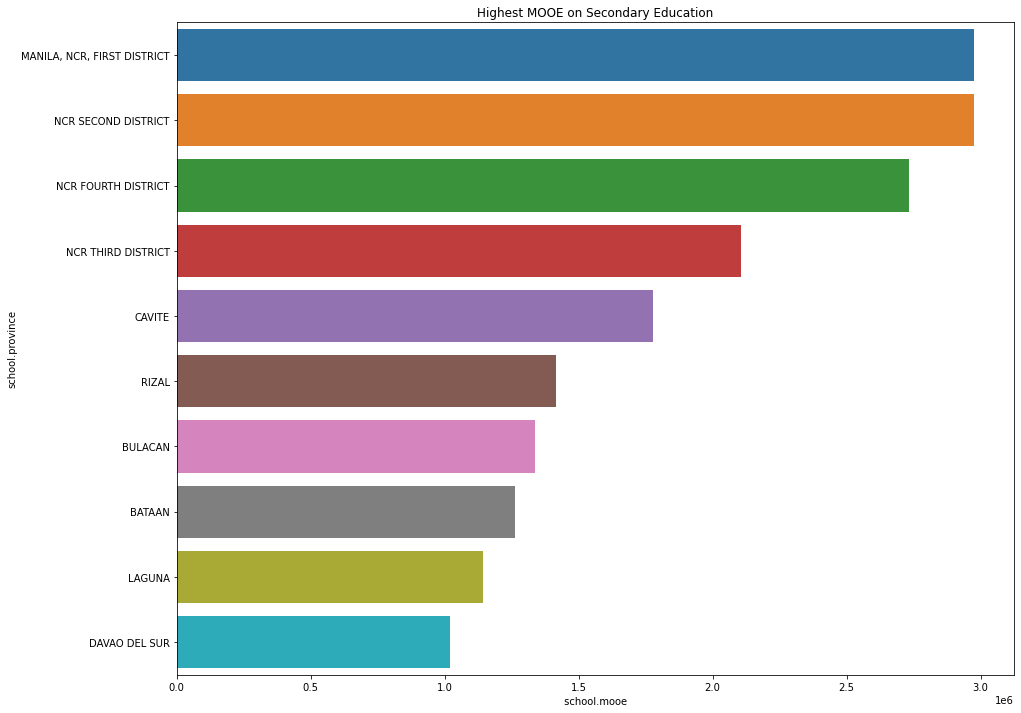

In [30]:
plt.figure(figsize=(15, 12))
sns.barplot(x=" school.mooe ", y="school.province", data=second3.sort_values(by=" school.mooe ",ascending=False).head(10))
plt.title("Highest MOOE on Secondary Education")
plt.savefig('secondaryBar.png')
plt.show()

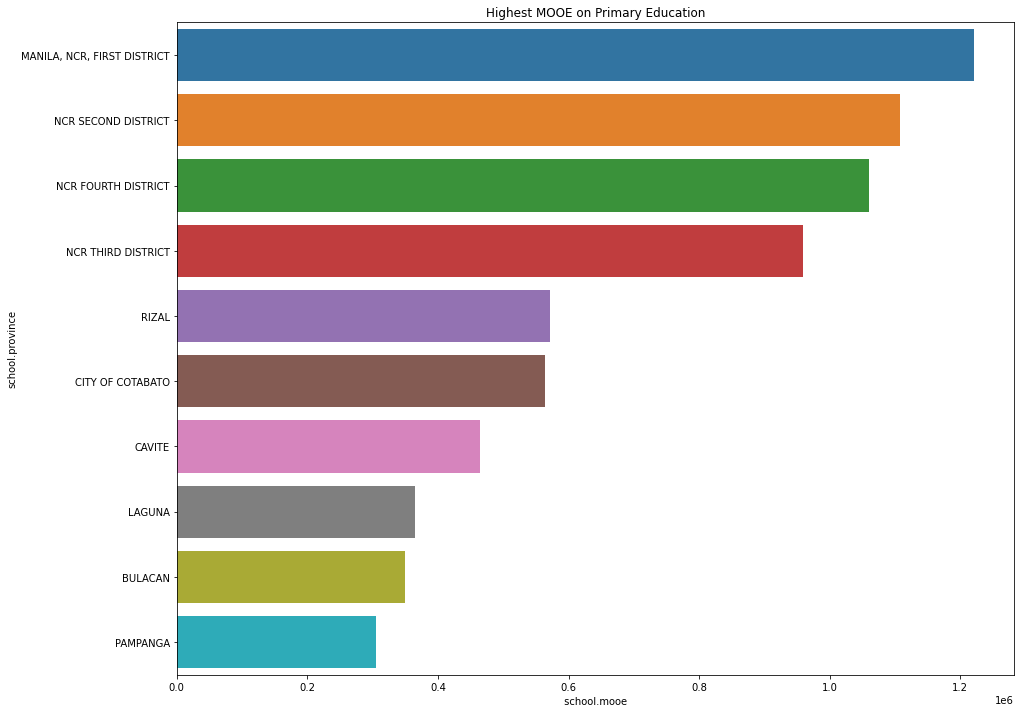

In [31]:
plt.figure(figsize=(15, 12))
sns.barplot(x=" school.mooe ", y="school.province", data=primary3.sort_values(by=" school.mooe ",ascending=False).tail(10))
plt.title("Highest MOOE on Primary Education")
plt.savefig('primaryBar.png')
plt.show()

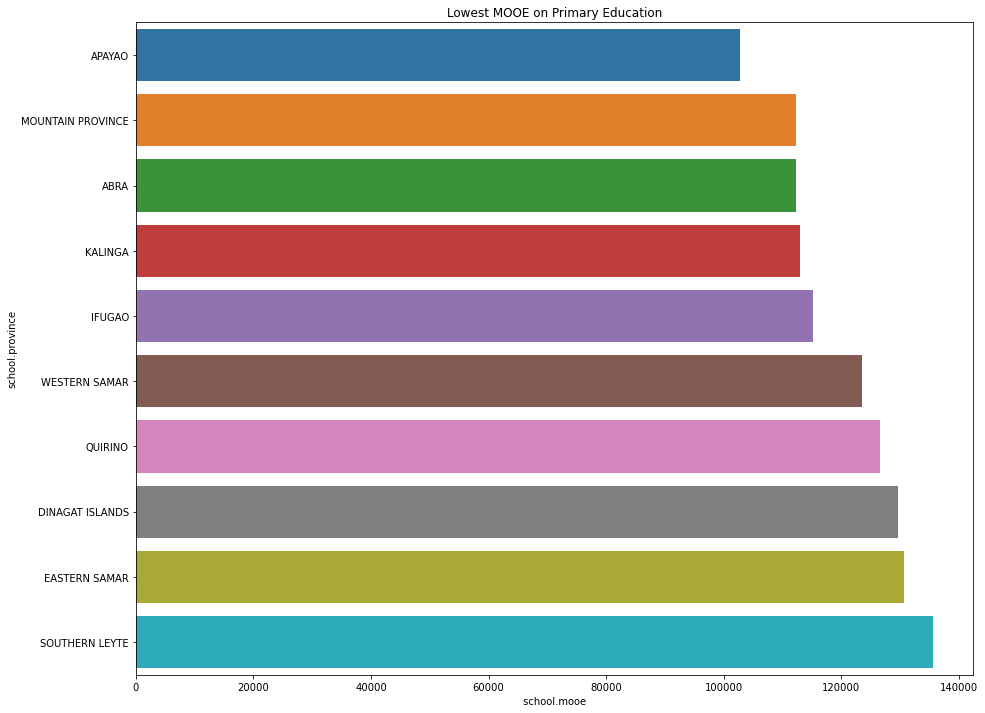

In [35]:
plt.figure(figsize=(15, 12))
sns.barplot(x=" school.mooe ", y="school.province", data=primary3.sort_values(by=" school.mooe ").head(10))
plt.title("Lowest MOOE on Primary Education")
plt.savefig('primaryBar2.png')
plt.show()

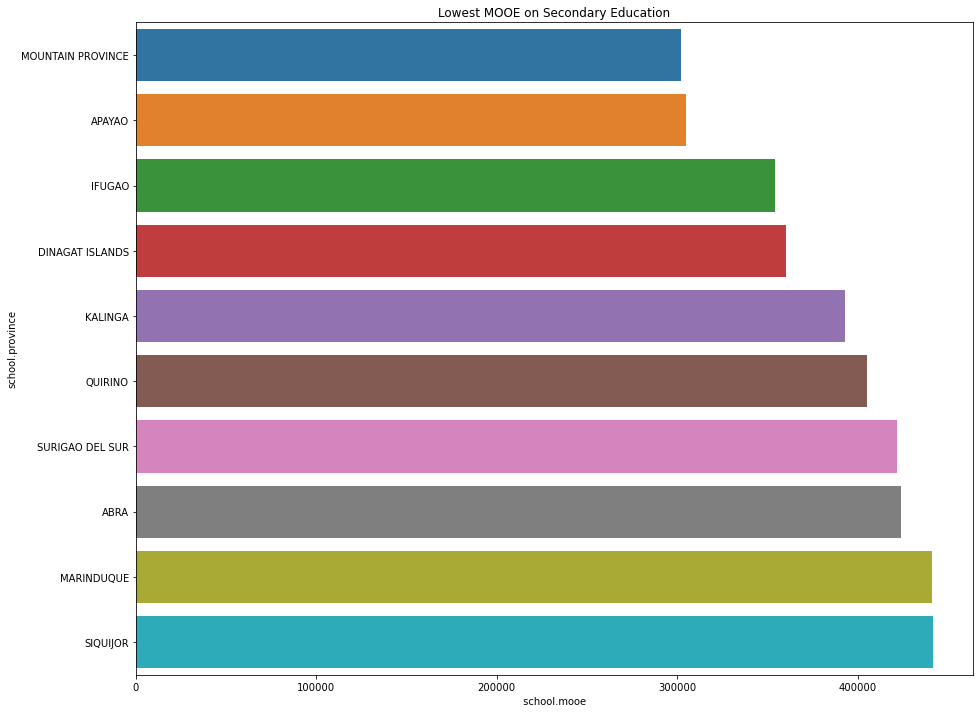

In [36]:
plt.figure(figsize=(15, 12))
sns.barplot(x=" school.mooe ", y="school.province", data=second3.sort_values(by=" school.mooe ").head(10))
plt.title("Lowest MOOE on Secondary Education")
plt.savefig('secondaryBar2.png')
plt.show()

In [26]:
second2

,school.province,school.id,school.mooe
0,ABRA,305074,223000.0
1,ABRA,305075,2182000.0
2,ABRA,305076,279000.0
3,ABRA,305077,186000.0
4,ABRA,305078,240000.0
...,...,...,...
7553,ZAMBOANGA SIBUGAY,314321,235000.0
7554,ZAMBOANGA SIBUGAY,314322,237000.0
7555,ZAMBOANGA SIBUGAY,314323,186000.0
7556,ZAMBOANGA SIBUGAY,314324,233000.0


In [18]:
shapefile = gpd.read_file("./PH Provinces Shapefile/Provinces.shp")
shapefile["PROVINCE"] = shapefile["PROVINCE"].str.upper()
shapefile

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,ABRA,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL NORTE,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL SUR,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,AKLAN,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,ALBAY,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
77,177,PHL,Philippines,78,Tawi-Tawi,None,None,Lalawigan|Probinsya,Province,TAWI-TAWI,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
78,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,ZAMBALES,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ..."
79,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,ZAMBOANGA DEL NORTE,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7..."
80,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,ZAMBOANGA DEL SUR,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6..."


In [19]:
primaryMap = pd.merge(shapefile,primary3,left_on="PROVINCE",right_on="school.province")
primaryMap

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,school.mooe
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,ABRA,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",ABRA,112364.620939
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL NORTE,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",AGUSAN DEL NORTE,210494.880546
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL SUR,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",AGUSAN DEL SUR,162413.186813
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,AKLAN,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",AKLAN,164675.000000
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,ALBAY,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",ALBAY,209857.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,177,PHL,Philippines,77,Tarlac,None,None,Lalawigan|Probinsya,Province,TARLAC,Central Luzon (Region III),"POLYGON ((120.63007 15.73335, 120.63052 15.729...",TARLAC,207968.810916
70,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,ZAMBALES,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",ZAMBALES,233785.454545
71,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,ZAMBOANGA DEL NORTE,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",ZAMBOANGA DEL NORTE,165076.071923
72,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,ZAMBOANGA DEL SUR,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",ZAMBOANGA DEL SUR,193415.094340


In [20]:
secondaryMap = pd.merge(shapefile,second3,left_on="PROVINCE",right_on="school.province")
secondaryMap

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,school.province,school.mooe
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,ABRA,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",ABRA,4.241515e+05
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL NORTE,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",AGUSAN DEL NORTE,5.527294e+05
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,AGUSAN DEL SUR,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",AGUSAN DEL SUR,5.104375e+05
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,AKLAN,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",AKLAN,5.166125e+05
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,ALBAY,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",ALBAY,7.787131e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,177,PHL,Philippines,77,Tarlac,None,None,Lalawigan|Probinsya,Province,TARLAC,Central Luzon (Region III),"POLYGON ((120.63007 15.73335, 120.63052 15.729...",TARLAC,1.000049e+06
70,177,PHL,Philippines,79,Zambales,None,None,Lalawigan|Probinsya,Province,ZAMBALES,Central Luzon (Region III),"MULTIPOLYGON (((120.08285 14.75048, 120.08222 ...",ZAMBALES,7.296184e+05
71,177,PHL,Philippines,80,Zamboanga del Norte,None,None,Lalawigan|Probinsya,Province,ZAMBOANGA DEL NORTE,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.09467 7.53152, 122.09467 7...",ZAMBOANGA DEL NORTE,5.522222e+05
72,177,PHL,Philippines,81,Zamboanga del Sur,None,None,Lalawigan|Probinsya,Province,ZAMBOANGA DEL SUR,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((122.06223 6.87278, 122.06250 6...",ZAMBOANGA DEL SUR,6.612360e+05


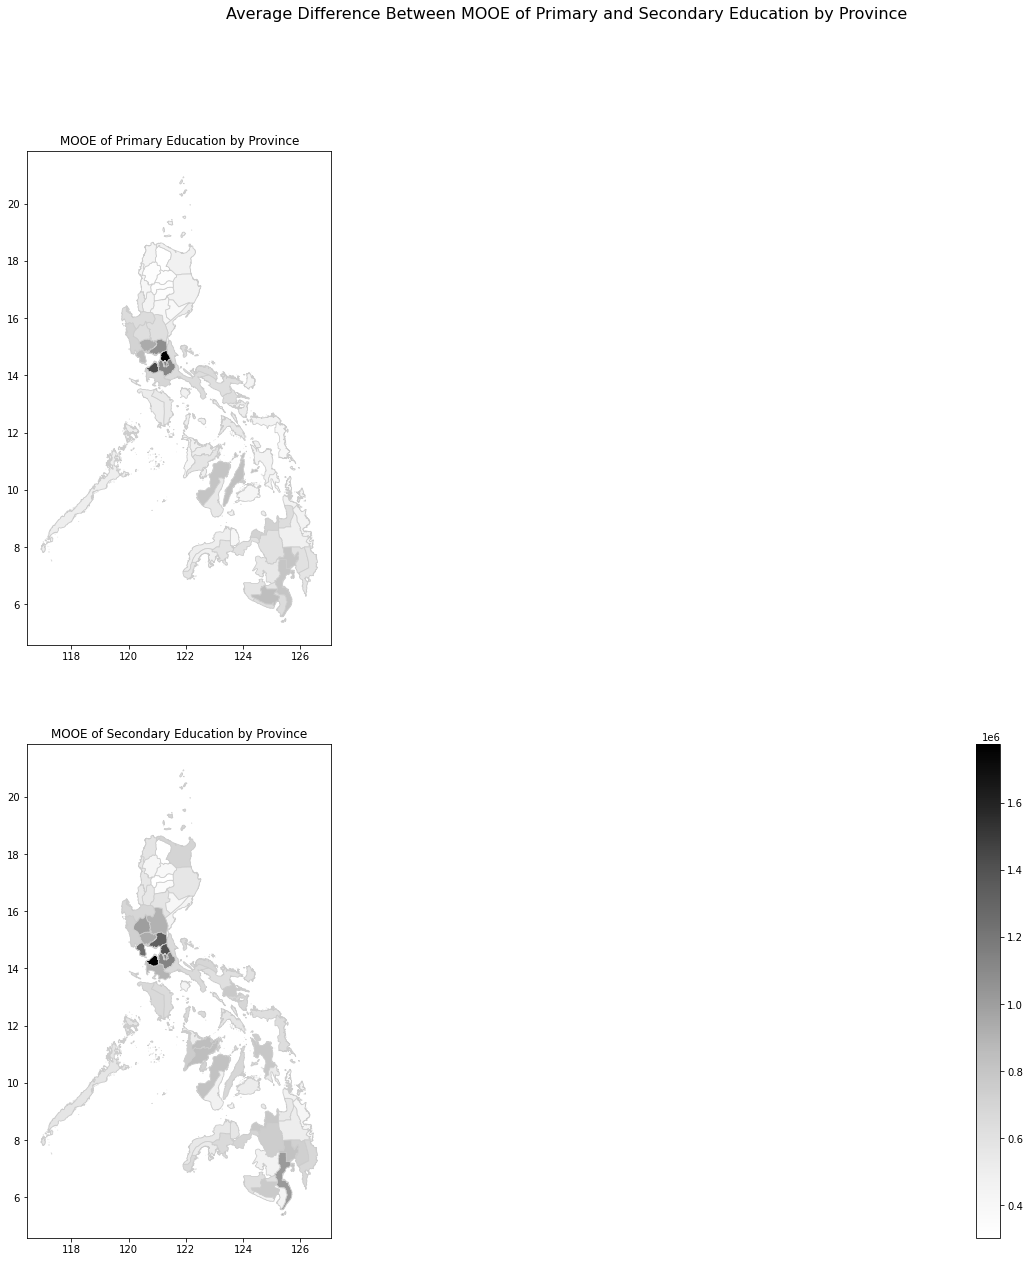

In [21]:

# set a variable that will call whatever column we want to visualise on the map
variable = ' school.mooe '
# set the range for the choropleth
vmin, vmax,vmin2,vmax2 = secondaryMap[variable].min(), secondaryMap[variable].max(),primaryMap[variable].min(), primaryMap[variable].max()
# create figure and axes for Matplotlib

fig, axes = plt.subplots(nrows=2, figsize=(20, 20))
fig.suptitle("Average Difference Between MOOE of Primary and Secondary Education by Province",fontsize=16)
# Complete the code

secondaryMap.plot(column=variable, cmap='Greys', linewidth=0.8, ax=axes[1], edgecolor='0.8', vmin=vmin, vmax=vmax)
axes[1].set_title("MOOE of Secondary Education by Province",fontsize=12)

primaryMap.plot(column=variable, cmap='Greys', linewidth=0.8, ax=axes[0], edgecolor='0.8', vmin=vmin2, vmax=vmax2)
axes[0].set_title("MOOE of Primary Education by Province",fontsize=12)
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)
for ax in axes:
    ax.set_anchor('W')

plt.savefig('graph.png')
plt.show()

### Question 2

<*Type question 2 here.*>

In [22]:
# Codes for question 2

### Question 3

<*Type question 3 here.*>

In [23]:
# Codes for question 3

### Question 4

<*Type question 4 here*>

In [24]:
# Codes for question 4